# The Kolmogorov-Smirnov Test - Lab

## Introduction
In the previous lesson, we saw that the Kolmogorov–Smirnov statistic quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples. In this lab, we shall see how to perform this test in Python. 

## Objectives

In this lab you will:

- Calculate a one- and two-sample Kolmogorov-Smirnov test
- Interpret the results of a one- and two-sample Kolmogorov-Smirnov test
- Compare K-S test to visual approaches for testing for normality assumption

### Data

Let's import the necessary libraries and generate some data. Run the following cell: 

In [60]:
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Create the normal random variables with mean 0, and sd 3
x_10 = stats.norm.rvs(loc=0, scale=3, size=10)
x_50 = stats.norm.rvs(loc=0, scale=3, size=50)
x_100 = stats.norm.rvs(loc=0, scale=3, size=100)
x_1000 = stats.norm.rvs(loc=0, scale=3, size=1000)

In [2]:
x_10

array([-2.77005118,  0.13231467, -2.49010815,  2.85869842, -2.70240637,
       -1.09145608, -1.87294517, -0.64531709,  0.10774277,  1.5444354 ])

### Plots 

Plot histograms and Q-Q plots of above datasets and comment on the output 

- How good are these techniques for checking normality assumptions?
- Compare both these techniques and identify their limitations/benefits etc. 


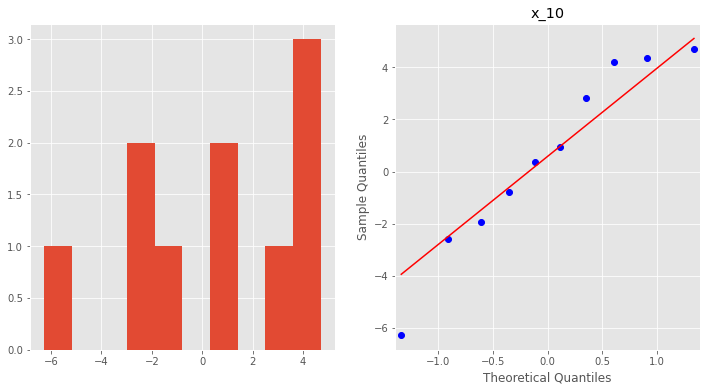

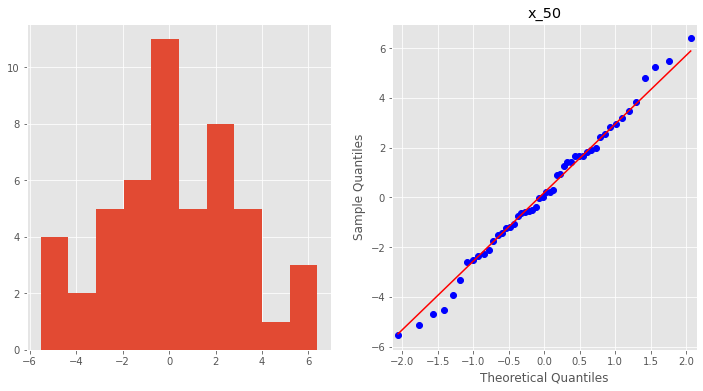

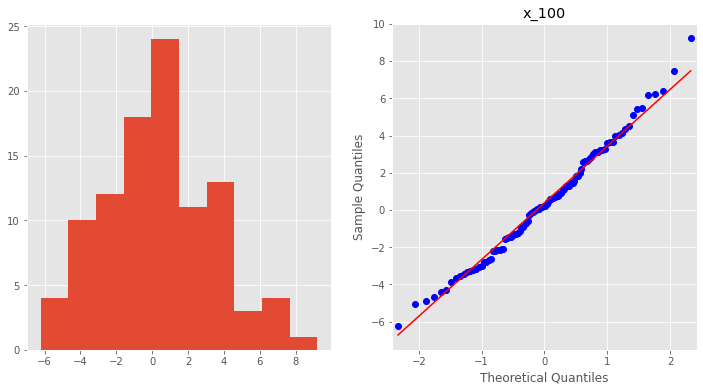

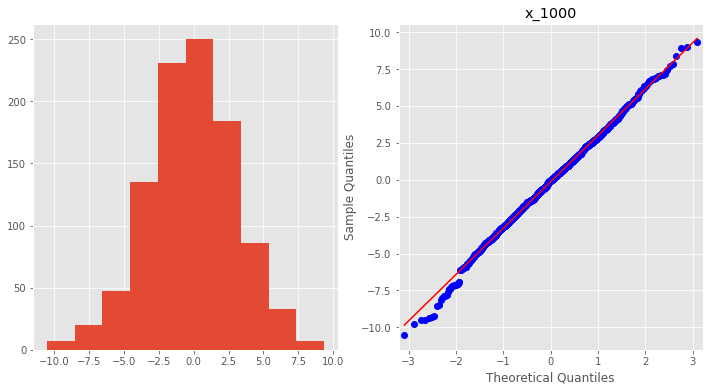

In [61]:
samps = [x_10, x_50, x_100, x_1000]
titles = ['x_10', 'x_50', 'x_100', 'x_1000']
for i, samp in enumerate(samps):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 6))
    ax1.hist(samp)
    plt.title(titles[i])
    sm.qqplot(samp, line='s', ax= ax2)
    plt.title(titles[i])
    plt.show()



In [ ]:
# Your comments here 

As the number of samples increases the plots fit the std line better.
Histograms cannot alone check for normality.


### Create a function to plot the normal CDF and ECDF for a given dataset
- Create a function to generate an empirical CDF from data
- Create a normal CDF using the same mean = 0 and sd = 3, having the same number of values as data

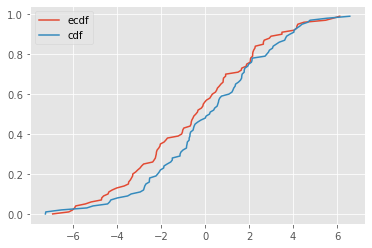

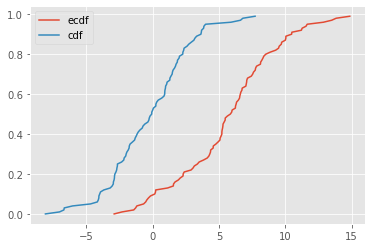

In [49]:
# You code here 

def ks_plot(data):
    # order data
    y = np.linspace(0, 1, len(data), endpoint=False)

    plt.plot(np.sort(data), y, label= 'ecdf')
    
    cdf = stats.norm.rvs(loc=0, scale=3, size=len(data))
#     cdf = np.sort(cdf)
    plt.plot(np.sort(cdf), y, label = 'cdf')
    plt.legend()
    plt.show()
# Uncomment below to run the test
ks_plot(stats.norm.rvs(loc=0, scale=3, size=100)) 
ks_plot(stats.norm.rvs(loc=5, scale=4, size=100))


This is awesome. The difference between the two CDFs in the second plot shows that the sample did not come from the distribution which we tried to compare it against. 

Now you can run all the generated datasets through the function `ks_plot()` and comment on the output.

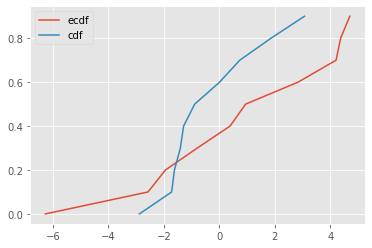

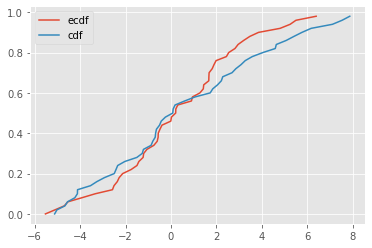

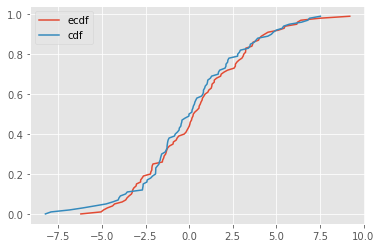

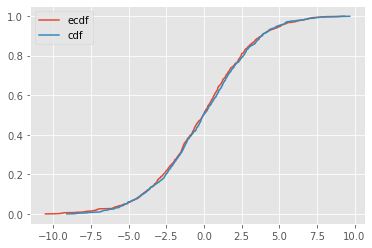

In [62]:
# Your code here 
for samp in samps:
    ks_plot(samp)

In [ ]:
# Your comments here 

As the sample size increases we can see a bitter fit.  Its hard to tell with small sample sizes.
So d would be high in small samples

### K-S test in SciPy

Let's run the Kolmogorov-Smirnov test, and use some statistics to get a final verdict on normality. We will test the hypothesis that the sample is a part of the standard t-distribution. In SciPy, we run this test using the function below:

```python
scipy.stats.kstest(rvs, cdf, args=(), N=20, alternative='two-sided', mode='approx')
```
Details on arguments being passed in can be viewed at this [link to the official doc.](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html)

Run the K-S test for normality assumption using the datasets created earlier and comment on the output: 
- Perform the K-S test against a normal distribution with mean = 0 and sd = 3
- If p < .05 we can reject the null hypothesis and conclude our sample distribution is not identical to a normal distribution 

In [63]:
# Perform K-S test
np.random.seed(999)
for sample in samps:
    print(stats.kstest(sample, 'norm', args=(0,3)))

# Your code here 

# KstestResult(statistic=0.1377823669421559, pvalue=0.9913389045954595)
# KstestResult(statistic=0.13970573965633104, pvalue=0.2587483380087914)
# KstestResult(statistic=0.0901015276393986, pvalue=0.37158535281797134)
# KstestResult(statistic=0.030748345486274697, pvalue=0.29574612286614443)

KstestResult(statistic=0.22774545043649097, pvalue=0.6007214638578535)
KstestResult(statistic=0.07542771375133389, pvalue=0.9180601781882998)
KstestResult(statistic=0.07485354745873296, pvalue=0.602805351273955)
KstestResult(statistic=0.02657438376208565, pvalue=0.47206877985469875)


In [ ]:
# Your comments here 
# Null hypothesis is the sample IS from a normal distribution.
# p is greater than 0.05 in all cases so we cannot reject the null hypothesis 
# meaning the samples are from a normal distribution.

Generate a uniform distribution and plot / calculate the K-S test against a uniform as well as a normal distribution: 

In [76]:
x_uni = np.random.rand(1000)
# Try with a uniform distribution
print(stats.kstest(x_uni, 'norm', args=(0,3)))
print(stats.kstest(x_uni, 'uniform'))

# KstestResult(statistic=0.023778383763166322, pvalue=0.6239045200710681)
# KstestResult(statistic=0.5000553288071681, pvalue=0.0)

KstestResult(statistic=0.5000147781915651, pvalue=1.0292337687941947e-231)
KstestResult(statistic=0.040626083571905836, pvalue=0.07168827814717682)


In [ ]:
# Your comments here 
When comparing to a normal distribution the p value is below alpha so
we reject the null hypothesis that the distribution is normal.  
So the disribution is not normal.

When comparing to a uniform distribution we the pvalue is above alpha
so we fail to reject the null hypotheses which is that the distribution is 
uniform.  So the the distribution IS uniform.

## Two-sample K-S test

A two-sample K-S test is available in SciPy using following function: 

```python 
scipy.stats.ks_2samp(data1, data2)[source]
```

Let's generate some bi-modal data first for this test: 

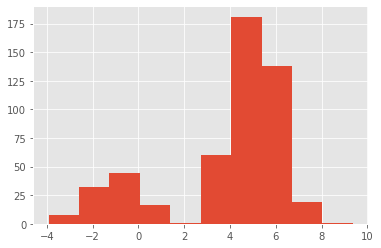

In [77]:
# Generate binomial data
N = 1000
x_1000_bi = np.concatenate((np.random.normal(-1, 1, int(0.1 * N)), np.random.normal(5, 1, int(0.4 * N))))[:, np.newaxis]
plt.hist(x_1000_bi);

Plot the CDFs for `x_1000_bimodal` and `x_1000` and comment on the output. 

In [86]:
len(x_1000_bi[:,0])

500

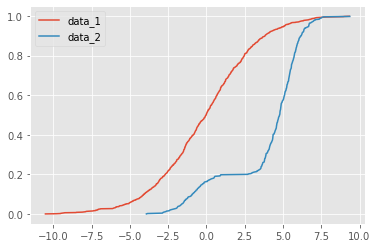

In [89]:
# Plot the CDFs
def ks_plot_2sample(data_1, data_2):
    '''
    Data entered must be the same size.  # But the data is not the same size.....
    '''
    y = np.linspace(0, 1, len(data_1), endpoint=False)

    plt.plot(np.sort(data_1), y, label= 'data_1')
    
    y = np.linspace(0, 1, len(data_2), endpoint=False)

    plt.plot(np.sort(data_2), y, label= 'data_2')
    plt.legend()
    plt.show()
    #cdf = stats.norm.rvs(loc=0, scale=3, size=len(data))
#     cdf = np.sort(cdf)
    #plt.plot(np.sort(cdf), y, label = 'cdf')

# Uncomment below to run
ks_plot_2sample(x_1000, x_1000_bi[:,0])


In [ ]:
# You comments here 
The bimodal data appears quite far from the normal data.  There is a flat area that
identifies the bimodal data.

Run the two-sample K-S test on `x_1000` and `x_1000_bi` and comment on the results. 

In [91]:
# Your code here
stats.kstest(x_1000, x_1000_bi[:,0])
# Ks_2sampResult(statistic=0.633, pvalue=4.814801487740621e-118)

KstestResult(statistic=0.66, pvalue=1.7763568394002505e-15)

In [ ]:
# Your comments here 
H0 is that the distributions are the same.  p is below alpha so we reject the null hypotheses
which suggests that the distributions are not the same.

## Summary

In this lesson, we saw how to check for normality (and other distributions) using one- and two-sample K-S tests. You are encouraged to use this test for all the upcoming algorithms and techniques that require a normality assumption. We saw that we can actually make assumptions for different distributions by providing the correct CDF function into Scipy K-S test functions. 